# Initial Analysis of Brinkman subjects in GGC-dataset

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset and subsets

In [18]:
# Import original GGC source data.
df = pd.read_csv('../data/original_source_data/vraag_20190620.txt', sep='\t')

# Import subsets.
df_content = pd.read_pickle('../data/original_source_data/df_zaaktrefwoorden.pkl')
df_form = pd.read_pickle('../data/original_source_data/df_vormtrefwoorden.pkl')

print('Number of rows in original dataset: ' + str(len(df)))
df.head(3)

Number of rows in original dataset: 12243


,maa1,maa2,ppn,jvu_1100,taal_1500_publ,taal_1500_orig,isbn_2000,unesco_1121,unesco_1122,nur_codes_5061,brinkman_520x,brinkman_520x_ppn,onix_7880,prim_auteur_3000,sec_auteur_3011,titel_4000,ondertitel_4000,samenvatting_4207
0,A,Aa,322079640,2015,ned,NaN,9.789054e+12,7,NaN,321,levensbeschrijvingen,075613816,9789054292692,Han/van@Bree$aut$!069567727!Han van Bree 1957-,NaN,De @geest van het Oude Loo,Juliana en haar vriendenkring 1947-1957,In het boek wordt de hofcrisis van 1956 voor h...
1,A,Aa,33015673X,2015,ned,fra,9.789490e+12,b,NaN,736,perceptie | esthetiek,075618451 | 075605503,9789490334086,Gilles@Deleuze$aut$!06860873X!Gilles Deleuze 1...,Walter/van der@Star$trl$!125379315!Walter van ...,@Francis Bacon,logica van de gewaarwording,Esthetische analyse van het werk van de Britse...
2,A,Aa,352655844,2015,ned,NaN,9.789460e+12,7,NaN,698,levensbeschrijvingen,075613816,9789460041228,Anton/van de@Sande$aut$!067525180!Antonius Wil...,NaN,@Prins Frederik der Nederlanden 1797-1881,gentleman naast de troon,"Beschrijving van het leven van prins Frederik,..."


## Brinkman subject analysis

### The number of Brinkman subjects assigned
We will start by checking how many Brinkman subjects are being assigned to single entries.

In [75]:
df_brinkman_sp = df['brinkman_520x'].str.split('|').str.len().value_counts().reset_index()
df_brinkman_sp.columns = ['Number of subjects', 'Entries']
df_brinkman_sp['Number of subjects'] = df_brinkman_sp['Number of subjects'].apply(np.int64)
df_brinkman_sp

,Number of subjects,Entries
0,1,8789
1,2,2693
2,3,680
3,4,75
4,5,5


### The number of times a Brinkman subject or combination of subjects are assigned.
The following table shows the number of times each Brinkman subject or combination of Brinkman subjects are assigned. The `|` (pipe) symbol is used as separator between each individual subject.

In [64]:
brinkman_termen = df['brinkman_520x'].value_counts().reset_index()
brinkman_termen.columns = ["Brinkman subject(s)", 'Was assigned x times']
brinkman_termen.head(20)

,Brinkman subject(s),Was assigned x times
0,romans en novellen ; vertaald,2165
1,romans en novellen ; oorspr. - Nederlands,1960
2,jeugdboeken ; verhalen,1265
3,levensbeschrijvingen,193
4,gedichten ; oorspr. - Nederlands,181
5,autobiografieën,99
6,columns,61
7,levenskunst,55
8,stripverhalen,48
9,jeugdboeken ; verhalen | prentenboeken,46


### The number of times an individual Brinkman subject is assigned.
The following table shows the number of times each individual Brinkman subject is assigned in the original dataset.

In [48]:
# See value_counts for each individual Brinkman subject.
brinkman_split = df['brinkman_520x'].str.split('|').apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
brinkman_split = brinkman_split['value'].str.strip().reset_index()
df_dist = brinkman_split.iloc[:, 1].value_counts().reset_index()
df_dist.columns = ['Brinkman subject', 'Was assigned x times']
df_dist

,Brinkman subject,Was assigned x times
0,romans en novellen ; vertaald,2238
1,romans en novellen ; oorspr. - Nederlands,2033
2,jeugdboeken ; verhalen,1456
3,levensbeschrijvingen,436
4,autobiografieën,291
...,...,...
2275,Palmyra,1
2276,bacteriën,1
2277,publiekrecht,1
2278,Borinage,1


There are a total of 2280 unique Brinkman subjects in the dataset - the file _brinkmanthesaurus_vocab.tsv_ (used as controlled vocabulary within Annif) has a total of 14737 unique subjects.

#### Frequency of individual Brinkman subjects in original dataset

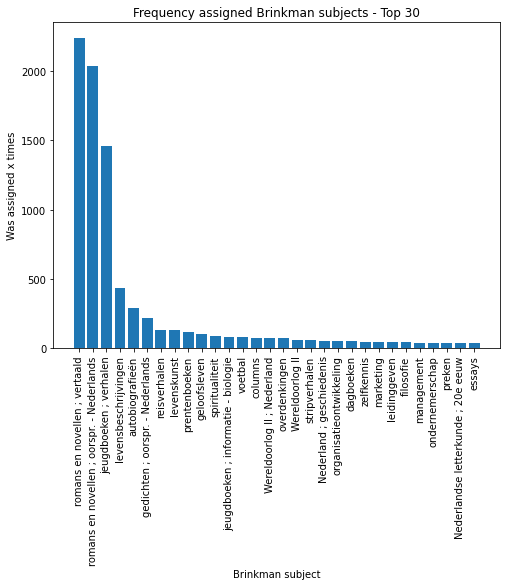

<Figure size 432x288 with 0 Axes>

In [106]:
# Visualize distribution of subjects in whole GGC dataset.
viz_size = 30
labels = df_dist.iloc[0:viz_size,0]
data = df_dist.iloc[0:viz_size,1]

plt.figure(num=None, figsize=(8, 6))
plt.bar(labels, data)
plt.title(f'Frequency assigned Brinkman subjects - Top {viz_size}')
plt.xlabel('Brinkman subject')
plt.ylabel('Was assigned x times')
plt.xticks(rotation=90)

plt.show()
# plt.savefig('freq_br.png', bbox_inches='tight')

The dataset is skewed to the right. There are three Brinkman subjects (which refer to the form of an entry) which dominate a large part of the data:
- romans en novellen ; vertaald
- romans en novellen ; oorspr. - Nederlands
- jeugdboeken ; verhalen

###  Baselines
To evaluate Annif backend outcomes we calculate the majority class baseline for our dataset.

Zero Rule for *romans en novellen ; vertaald* :

In [7]:
print(str(round(2238 / 12243 * 100.0, 1)) + '%')

18.3%


#### Zero Rule content subjects _ggc\_zaaktrefwoorden_ subset

In [16]:
df_content.head(3)

,maa1,maa2,ppn,jvu_1100,taal_1500_publ,taal_1500_orig,isbn_2000,unesco_1121,unesco_1122,nur_codes_5061,brinkman_520x,brinkman_520x_ppn,onix_7880,prim_auteur_3000,sec_auteur_3011,titel_4000,ondertitel_4000,samenvatting_4207,samenvatting_plus_titel
1,A,Aa,33015673X,2015,ned,fra,9.789490e+12,b,NaN,736,"[esthetiek, perceptie]","[075618451, 075605503]",9789490334086,Gilles@Deleuze$aut$!06860873X!Gilles Deleuze 1...,Walter/van der@Star$trl$!125379315!Walter van ...,@Francis Bacon,logica van de gewaarwording,Esthetische analyse van het werk van de Britse...,Francis Bacon logica van de gewaarwording Est...
3,A,Aa,352699566,2015,ned,NaN,9.789462e+12,z,NaN,648,[vakantieverblijven],[075625156],9789462080744,Mieke@Dings$aut$!270022139!Mieke Dings 1979-,NaN,@Tussen tent en villa,het vakantiepark in Nederland 1920-nu,Het vakantiepark: wie heeft er niet weleens ee...,Tussen tent en villa het vakantiepark in Nede...
5,A,Aa,363250565,2016,ned,NaN,9.789039e+12,7,NaN,320,[Marokkanen],[07566111X],9789038898254,Salaheddine@Benchikhi$aut$!296322547!Salaheddi...,NaN,@Salaheddine punt NL,kom maar op met Nederland,In Salaheddine punt NL vertelt Salaheddine hoe...,Salaheddine punt NL kom maar op met Nederland...


In [24]:
assigned_ctsubs = df_content['brinkman_520x'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
assigned_ctsubs['value'].str.strip().reset_index()
vc_ctsubs = assigned_ctsubs.iloc[:, 0].value_counts().reset_index()
vc_ctsubs.columns = ['Brinkman subject', 'Was assigned x times']
vc_ctsubs

,Brinkman subject,Was assigned x times
0,reisverhalen,134
1,levenskunst,133
2,geloofsleven,103
3,spiritualiteit,88
4,voetbal,79
...,...,...
2155,zeilvaart ; geschiedenis,1
2156,getijden,1
2157,Senegal,1
2158,geloof en wetenschap,1


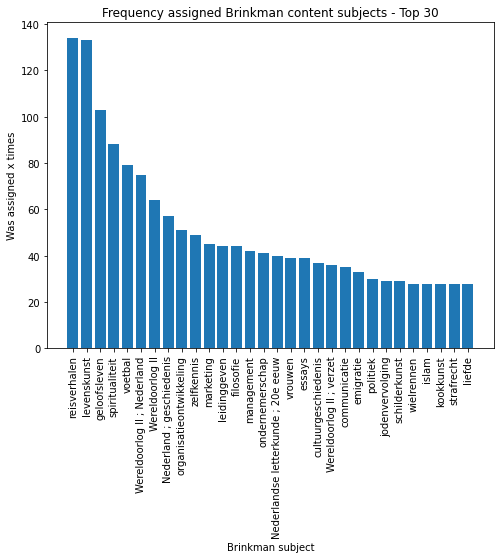

In [31]:
# Visualize distribution of content subjects.
viz_size = 30
labels = vc_ctsubs.iloc[0:viz_size,0]
data = vc_ctsubs.iloc[0:viz_size,1]

plt.figure(num=None, figsize=(8, 6))
plt.bar(labels, data)
plt.title(f'Frequency assigned Brinkman content subjects - Top {viz_size}')
plt.xlabel('Brinkman subject')
plt.ylabel('Was assigned x times')
plt.xticks(rotation=90)
plt.show()

In [15]:
print(str(round(134 / len(df_content) * 100.0, 1)) + '%')

2.3%


#### Zero Rule form subjects _ggc\_vormtrefwoorden_ subset

In [19]:
df_form.head(3)

,maa1,maa2,ppn,jvu_1100,taal_1500_publ,taal_1500_orig,isbn_2000,unesco_1121,unesco_1122,nur_codes_5061,brinkman_520x,brinkman_520x_ppn,onix_7880,prim_auteur_3000,sec_auteur_3011,titel_4000,ondertitel_4000,samenvatting_4207,samenvatting_plus_titel
0,A,Aa,322079640,2015,ned,NaN,9.789054e+12,7,NaN,321,[levensbeschrijvingen],[075613816],9789054292692,Han/van@Bree$aut$!069567727!Han van Bree 1957-,NaN,De @geest van het Oude Loo,Juliana en haar vriendenkring 1947-1957,In het boek wordt de hofcrisis van 1956 voor h...,De geest van het Oude Loo Juliana en haar vri...
2,A,Aa,352655844,2015,ned,NaN,9.789460e+12,7,NaN,698,[levensbeschrijvingen],[075613816],9789460041228,Anton/van de@Sande$aut$!067525180!Antonius Wil...,NaN,@Prins Frederik der Nederlanden 1797-1881,gentleman naast de troon,"Beschrijving van het leven van prins Frederik,...",Prins Frederik der Nederlanden 1797-1881 gent...
4,A,Aa,362837317,2015,ned,NaN,9.789047e+12,4,NaN,301,[romans en novellen ; oorspr. - Nederlands],[075629402],9789046815809,Jan/van der@Mast$aut$!07502943X!Jan van der Ma...,NaN,@Agneta,,"Jacques van Marken (1845-1906), oprichter van ...","Agneta Jacques van Marken (1845-1906), opri..."


In [25]:
assigned_frsubs = df_form['brinkman_520x'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')
assigned_frsubs['value'].str.strip().reset_index()
vc_frsubs = assigned_frsubs.iloc[:, 0].value_counts().reset_index()
vc_frsubs.columns = ['Brinkman subject', 'Was assigned x times']
vc_frsubs

,Brinkman subject,Was assigned x times
0,romans en novellen ; vertaald,2238
1,romans en novellen ; oorspr. - Nederlands,2033
2,jeugdboeken ; verhalen,1456
3,levensbeschrijvingen,436
4,autobiografieën,291
...,...,...
108,leermiddelen ; omgangskunde,1
109,leermiddelen ; maatschappijleer,1
110,romans en novellen ; oorspr. - Nederlandse str...,1
111,Nederlandse Antillen ; reisgidsen,1


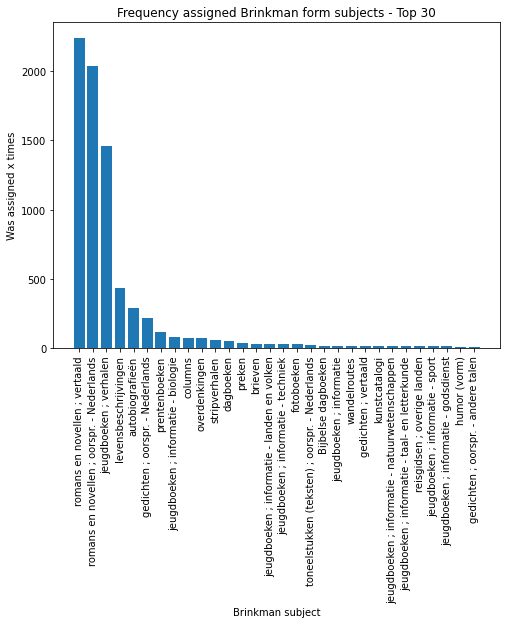

In [29]:
# Visualize distribution of form subjects.
viz_size = 30
labels = vc_frsubs.iloc[0:viz_size,0]
data = vc_frsubs.iloc[0:viz_size,1]

plt.figure(num=None, figsize=(8, 6))
plt.bar(labels, data)
plt.title(f'Frequency assigned Brinkman form subjects - Top {viz_size}')
plt.xlabel('Brinkman subject')
plt.ylabel('Was assigned x times')
plt.xticks(rotation=90)
plt.show()

In [23]:
print(str(round(2238 / len(df_form) * 100.0, 1)) + '%')

30.1%
